In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
users = pd.read_csv('users.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Train size: ', len(train))
print('Test size: ', len(test))
train

Train size:  73539
Test size:  55970


,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country_code                 73539 non-null  int64 
 1   grass_date                   73539 non-null  object
 2   user_id                      73539 non-null  int64 
 3   subject_line_length          73539 non-null  int64 
 4   last_open_day                73539 non-null  object
 5   last_login_day               73539 non-null  object
 6   last_checkout_day            73539 non-null  object
 7   open_count_last_10_days      73539 non-null  int64 
 8   open_count_last_30_days      73539 non-null  int64 
 9   open_count_last_60_days      73539 non-null  int64 
 10  login_count_last_10_days     73539 non-null  int64 
 11  login_count_last_30_days     73539 non-null  int64 
 12  login_count_last_60_days     73539 non-null  int64 
 13  checkout_count_last_10_days  73

In [5]:
train['grass_date'] = pd.to_datetime(train['grass_date'])
test['grass_date'] = pd.to_datetime(test['grass_date'])

In [6]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    print(train[~train[x].str.isnumeric()][x].unique())

['Never open']
['Never login']
['Never checkout']


- last_open_day: 'Never open' → max
- last_login_day: 'Never login' → max
- last_checkout_day: 'Never checkout' → max

In [7]:
for x in ['last_open_day', 'last_login_day', 'last_checkout_day']:
    train[x] = train[x].apply(lambda x: x if x.isnumeric() else -1)
    test[x] = test[x].apply(lambda x: x if x.isnumeric() else -1)

    train[x] = train[x].astype(int)
    test[x] = test[x].astype(int)

    max_value = train[x].max()
    train[x] = train[x].apply(lambda x: max_value if x==-1 else x)
    test[x] = test[x].apply(lambda x: max_value if x==-1 else x)

In [8]:
train.iloc[1739]

country_code                                           2
grass_date                     2019-07-16 00:00:00+08:00
user_id                                            90499
subject_line_length                                   46
last_open_day                                        808
last_login_day                                     18141
last_checkout_day                                   1445
open_count_last_10_days                                0
open_count_last_30_days                                0
open_count_last_60_days                                2
login_count_last_10_days                               0
login_count_last_30_days                               0
login_count_last_60_days                               0
checkout_count_last_10_days                            0
checkout_count_last_30_days                            0
checkout_count_last_60_days                            0
open_flag                                              0
row_id                         

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73539 entries, 0 to 73538
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [10]:
users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127886 entries, 0 to 127885
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  127886 non-null  int64  
 1   attr_1   78987 non-null   float64
 2   attr_2   127439 non-null  float64
 3   attr_3   127886 non-null  float64
 4   age      78987 non-null   float64
 5   domain   127886 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


In [12]:
users['attr_1'] = users['attr_1'].fillna(0)
users['attr_2'] = users['attr_2'].fillna(0)

For now, don't use `age`

In [13]:
new_train = pd.merge(train, users, left_on='user_id', right_on='user_id', how='inner')
new_test = pd.merge(test, users, left_on='user_id', right_on='user_id', how='inner')

In [14]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype                                
---  ------                       --------------  -----                                
 0   country_code                 73539 non-null  int64                                
 1   grass_date                   73539 non-null  datetime64[ns, pytz.FixedOffset(480)]
 2   user_id                      73539 non-null  int64                                
 3   subject_line_length          73539 non-null  int64                                
 4   last_open_day                73539 non-null  int64                                
 5   last_login_day               73539 non-null  int64                                
 6   last_checkout_day            73539 non-null  int64                                
 7   open_count_last_10_days      73539 non-null  int64                                
 8   open_c

In [15]:
new_train['day_of_week'] = new_train['grass_date'].dt.dayofweek
new_test['day_of_week'] = new_test['grass_date'].dt.dayofweek

new_train.sample(5).loc[:, ['grass_date', 'day_of_week']]

,grass_date,day_of_week
12133,2019-07-23 00:00:00+08:00,1
66851,2019-09-01 00:00:00+08:00,6
35319,2019-08-08 00:00:00+08:00,3
55641,2019-08-22 00:00:00+08:00,3
69282,2019-09-01 00:00:00+08:00,6


In [16]:
print('Total rows: ', len(new_train))
print('Total users: ', len(new_train['user_id'].unique()))

Total rows:  73539
Total users:  72845


In [17]:
user_id_count_dict = new_train.groupby('user_id').count()['country_code'].to_dict()
new_train['user_id_count'] = new_train['user_id'].map(user_id_count_dict)
new_test['user_id_count'] = new_test['user_id'].map(lambda id: user_id_count_dict.get(id, 1))
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,user_id_count
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,10,0,0,1.0,1.0,2.0,47.0,@gmail.com,1,1
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,27,0,2,0.0,1.0,0.0,NaN,@yahoo.com,1,1
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com,1,1
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,0,4,0.0,1.0,0.0,NaN,@hotmail.com,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,0,0,73534,0.0,1.0,0.0,NaN,@hotmail.com,0,1
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,0,0,73535,1.0,1.0,2.0,30.0,@gmail.com,0,1
73536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,0,0,73536,0.0,0.0,0.0,NaN,@gmail.com,0,1
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,0,1,73537,1.0,1.0,1.0,38.0,@gmail.com,0,1


In [18]:
print(new_train['user_id_count'].unique())
print(new_test['user_id_count'].unique())

[1 2 3]
[1 2]


In [19]:
new_train['age'] = new_train['age'].fillna(-1)
new_test['age'] = new_test['age'].fillna(-1)
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,user_id_count
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,10,0,0,1.0,1.0,2.0,47.0,@gmail.com,1,1
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,4,1,1,1.0,1.0,2.0,25.0,@hotmail.com,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,27,0,2,0.0,1.0,0.0,-1.0,@yahoo.com,1,1
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,6,0,3,1.0,1.0,2.0,24.0,@yahoo.com,1,1
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,0,4,0.0,1.0,0.0,-1.0,@hotmail.com,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,0,0,73534,0.0,1.0,0.0,-1.0,@hotmail.com,0,1
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,0,0,73535,1.0,1.0,2.0,30.0,@gmail.com,0,1
73536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,0,0,73536,0.0,0.0,0.0,-1.0,@gmail.com,0,1
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,0,1,73537,1.0,1.0,1.0,38.0,@gmail.com,0,1


In [20]:
def age_group(age): return -1 if age < 0 else 1 if age < 18 else 2 if age < 35 else 3 if age < 50 else 4

new_train['age_group'] = new_train['age'].map(age_group)
new_test['age_group'] = new_test['age'].map(age_group)
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,user_id_count,age_group
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,0,0,1.0,1.0,2.0,47.0,@gmail.com,1,1,3
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,1,1,1.0,1.0,2.0,25.0,@hotmail.com,1,1,2
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,0,2,0.0,1.0,0.0,-1.0,@yahoo.com,1,1,-1
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,0,3,1.0,1.0,2.0,24.0,@yahoo.com,1,1,2
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,0,4,0.0,1.0,0.0,-1.0,@hotmail.com,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,0,73534,0.0,1.0,0.0,-1.0,@hotmail.com,0,1,-1
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,0,73535,1.0,1.0,2.0,30.0,@gmail.com,0,1,2
73536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,0,73536,0.0,0.0,0.0,-1.0,@gmail.com,0,1,-1
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,1,73537,1.0,1.0,1.0,38.0,@gmail.com,0,1,3


In [21]:
def weekend(x): return 1 if x == 5 or x == 6 else 0

new_train['weekend'] = new_train['day_of_week'].map(weekend)
new_test['weekend'] = new_test['day_of_week'].map(weekend)
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,user_id_count,age_group,weekend
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,0,1.0,1.0,2.0,47.0,@gmail.com,1,1,3,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,1,1.0,1.0,2.0,25.0,@hotmail.com,1,1,2,0
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,2,0.0,1.0,0.0,-1.0,@yahoo.com,1,1,-1,0
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,3,1.0,1.0,2.0,24.0,@yahoo.com,1,1,2,0
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,4,0.0,1.0,0.0,-1.0,@hotmail.com,1,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,73534,0.0,1.0,0.0,-1.0,@hotmail.com,0,1,-1,0
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,73535,1.0,1.0,2.0,30.0,@gmail.com,0,1,2,0
73536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,73536,0.0,0.0,0.0,-1.0,@gmail.com,0,1,-1,0
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,73537,1.0,1.0,1.0,38.0,@gmail.com,0,1,3,0


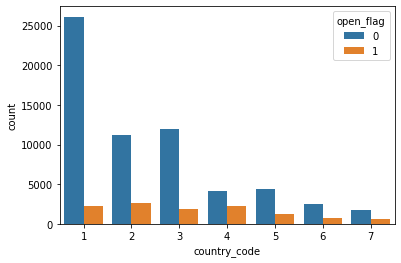

In [22]:
sns.countplot(x='country_code', hue='open_flag', data=new_train)

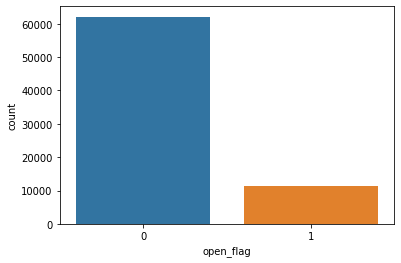

In [23]:
sns.countplot(x='open_flag', data=new_train)

In [24]:
features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days',
    'attr_1', 'attr_2', 'attr_3',
    'country_code', 'domain', 'day_of_week',
    'user_id_count', 'age', 'age_group',
    'weekend'
]

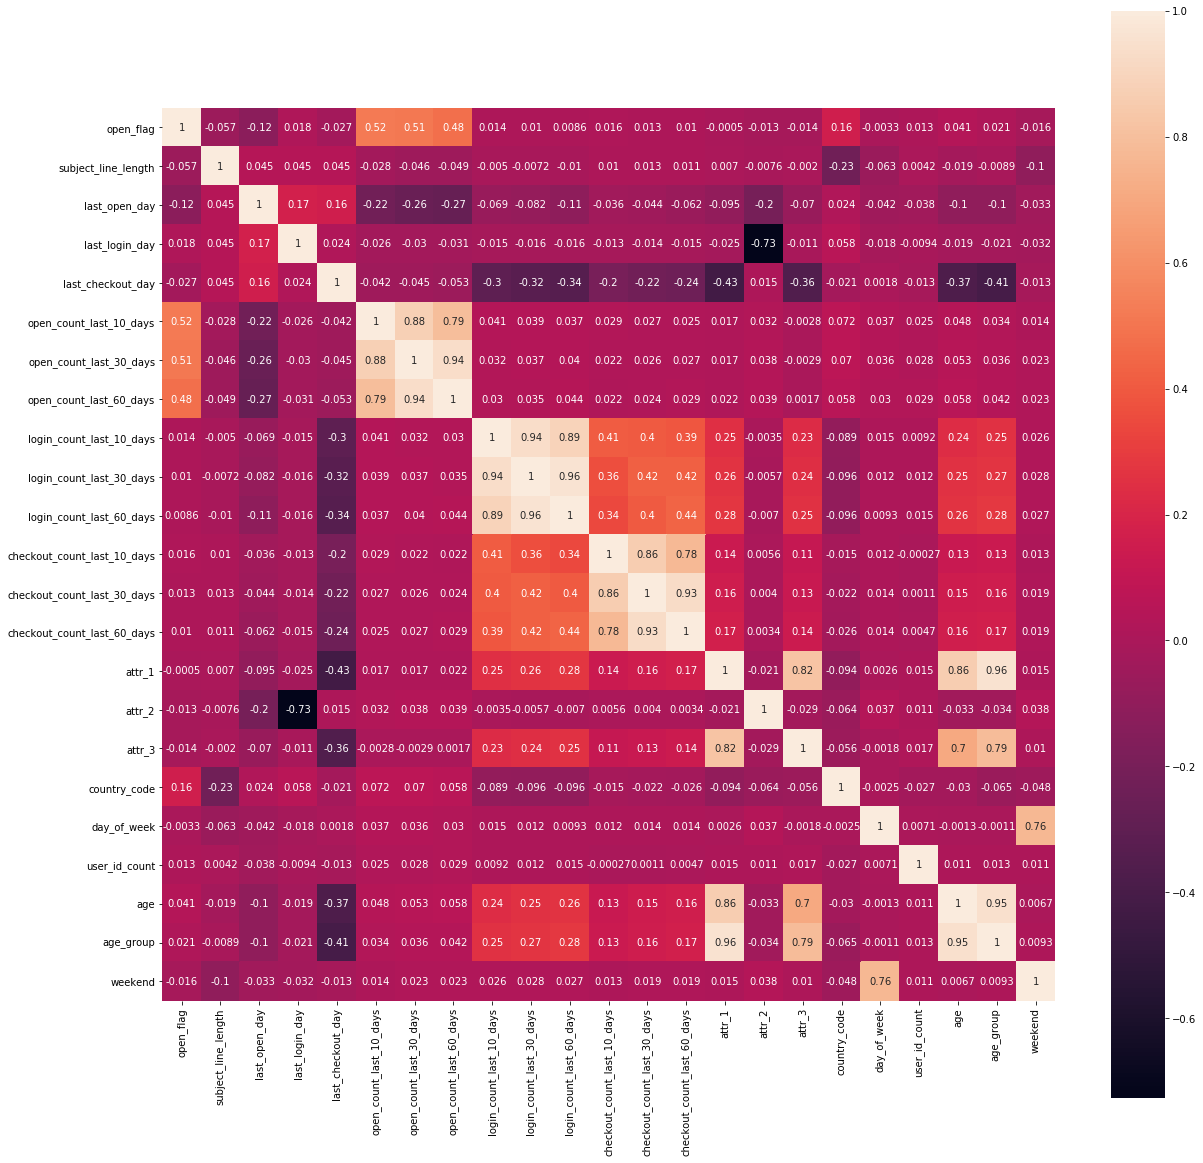

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(
    new_train.loc[:, ['open_flag'] + features].corr(), 
    square=True, annot=True
)

In [26]:
cont_features = [
    'subject_line_length',
    'last_open_day','last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days',
    'open_count_last_60_days', 'login_count_last_10_days',
    'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days',
    'checkout_count_last_60_days',
    'user_id_count', 'age'
]
cat_features = [
    'attr_1', 'attr_2', 'attr_3',
    'country_code', 'domain', 'day_of_week',
    'age_group', 'weekend',
]

print('Number of continuous features: ', len(cont_features))
print('Number of categorical features: ', len(cat_features))

Number of continuous features:  15
Number of categorical features:  8


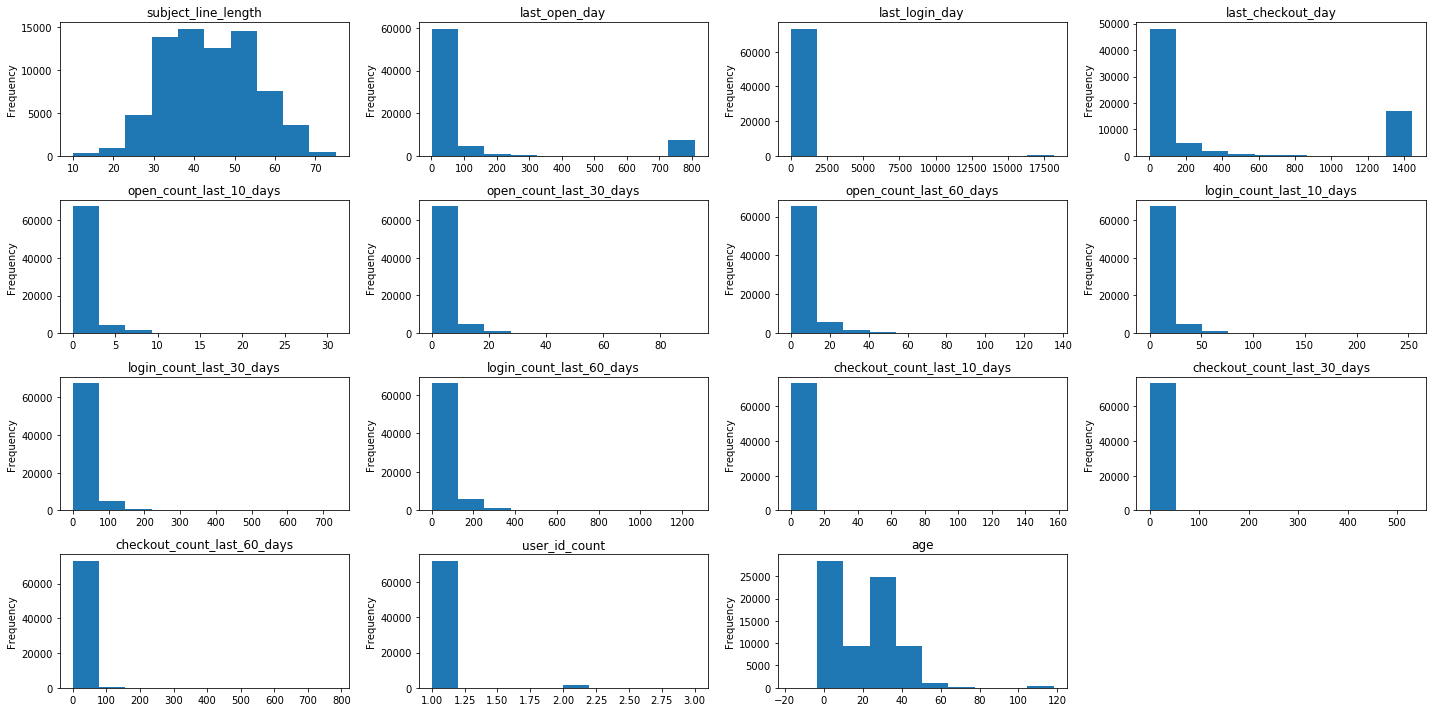

In [27]:
plt.figure(figsize=(20,10))
for i, x in enumerate(cont_features):
    plt.subplot(4, 4, i+1)
    new_train[x].plot.hist()
    plt.title(x)

plt.tight_layout()

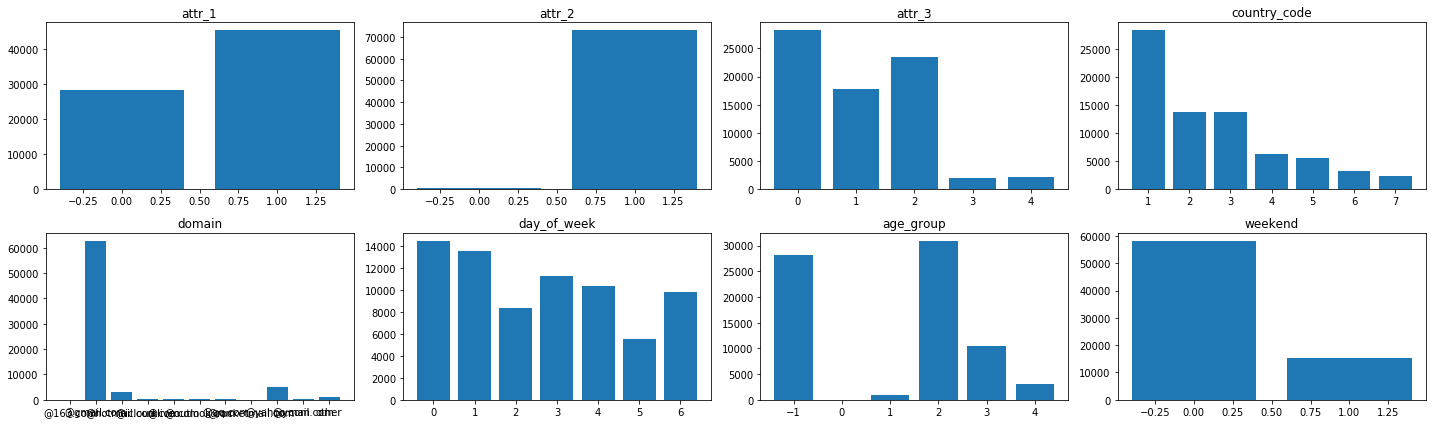

In [28]:
plt.figure(figsize=(20,6))
for i, x in enumerate(cat_features):
    plt.subplot(2, 4, i+1)
    count = new_train.groupby(x).count()['open_flag']
    plt.bar(count.index, count)
    plt.title(x)

plt.tight_layout()

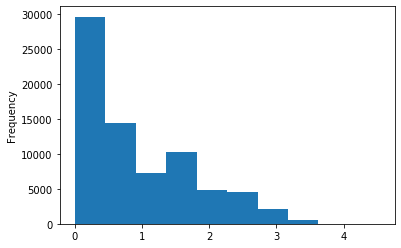

In [29]:
np.log(new_train['open_count_last_30_days'] + 1).plot.hist()

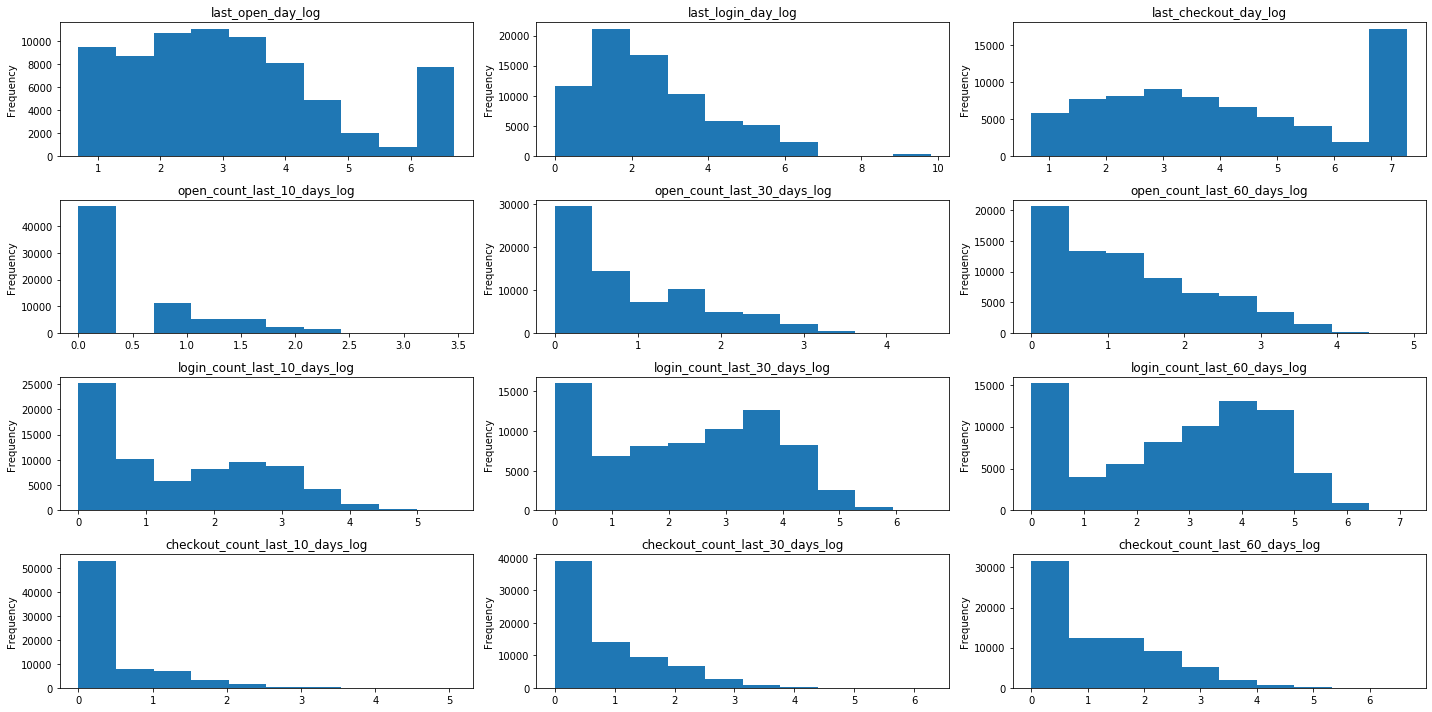

In [30]:
log_features = [
    'last_open_day', 'last_login_day', 'last_checkout_day',
    'open_count_last_10_days', 'open_count_last_30_days', 'open_count_last_60_days',
    'login_count_last_10_days', 'login_count_last_30_days', 'login_count_last_60_days',
    'checkout_count_last_10_days', 'checkout_count_last_30_days', 'checkout_count_last_60_days', 
]

plt.figure(figsize=(20,10))
for i, x in enumerate(log_features):
    new_train[x + '_log'] = np.log(new_train[x] + 1)
    new_test[x + '_log'] = np.log(new_test[x] + 1)
    
    plt.subplot(4,3,i+1)
    new_train[x + '_log'].plot.hist()
    plt.title(x + '_log')

plt.tight_layout()

In [31]:
TEST_SIZE = 1000
test_data = pd.DataFrame(columns=new_train.columns)

for i in range(2):
    df = new_train[new_train['open_flag'] == i]
    df = df.sample(1000, random_state=0)
    test_data = test_data.append(df, ignore_index=True)

test_data

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,last_checkout_day_log,open_count_last_10_days_log,open_count_last_30_days_log,open_count_last_60_days_log,login_count_last_10_days_log,login_count_last_30_days_log,login_count_last_60_days_log,checkout_count_last_10_days_log,checkout_count_last_30_days_log,checkout_count_last_60_days_log
0,2,2019-08-07 00:00:00+08:00,807,38,28,6,11,0,0,1,...,2.484907,0.000000,0.000000,0.693147,3.135494,4.127134,4.644391,0.0,2.484907,2.708050
1,2,2019-08-02 00:00:00+08:00,59411,58,4,16,16,3,8,12,...,2.833213,1.386294,2.197225,2.564949,1.609438,2.079442,2.079442,0.0,0.693147,0.693147
2,2,2019-08-02 00:00:00+08:00,58400,58,1,484,1445,1,1,3,...,7.276556,0.693147,0.693147,1.386294,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,2,2019-07-16 00:00:00+08:00,75781,36,4,5,1445,3,8,13,...,7.276556,1.386294,2.197225,2.639057,1.791759,2.079442,3.135494,0.0,0.000000,0.000000
4,6,2019-08-09 00:00:00+08:00,52916,53,1,158,1445,1,2,5,...,7.276556,0.693147,1.098612,1.791759,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,2019-07-25 00:00:00+08:00,109479,58,22,6,1445,3,6,6,...,7.276556,1.386294,1.945910,1.945910,0.693147,2.079442,2.639057,0.0,0.000000,0.000000
1996,4,2019-08-16 00:00:00+08:00,17590,44,2,1,40,2,9,12,...,3.713572,1.098612,2.302585,2.564949,2.484907,3.637586,4.234107,0.0,0.000000,1.098612
1997,2,2019-08-29 00:00:00+08:00,26140,23,34,207,237,0,0,3,...,5.472271,0.000000,0.000000,1.386294,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1998,2,2019-08-29 00:00:00+08:00,14612,23,29,6,22,0,1,8,...,3.135494,0.000000,0.693147,2.197225,2.302585,3.465736,4.204693,0.0,1.098612,2.079442


In [32]:
new_train = new_train[~new_train['row_id'].isin(test_data['row_id'])]
new_train = new_train.reset_index(drop=True)
new_train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,last_checkout_day_log,open_count_last_10_days_log,open_count_last_30_days_log,open_count_last_60_days_log,login_count_last_10_days_log,login_count_last_30_days_log,login_count_last_60_days_log,checkout_count_last_10_days_log,checkout_count_last_30_days_log,checkout_count_last_60_days_log
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,...,2.944439,0.000000,1.098612,1.609438,2.564949,3.784190,4.605170,0.000000,1.791759,2.397895
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,...,2.197225,1.098612,2.302585,2.890372,2.944439,3.891820,4.510860,0.693147,0.693147,1.609438
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,1.791759,0.000000,1.609438,2.564949,3.218876,4.248495,4.787492,1.791759,2.995732,3.332205
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,...,3.988984,0.000000,0.000000,0.693147,2.302585,3.178054,4.248495,0.693147,1.386294,1.945910
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,5.402677,0.000000,0.000000,0.000000,1.098612,1.791759,1.791759,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,5.634790,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,...,3.951244,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71536,2,2019-09-02 00:00:00+08:00,127696,32,808,18141,1445,0,0,0,...,7.276556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,1445,2,4,4,...,7.276556,1.098612,1.609438,1.609438,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
test_data.to_csv('test_data.csv', index=False)
new_train.to_csv('train_data.csv', index=False)
new_test.to_csv('test_kaggle.csv', index=False)